In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from butiran.math.vect3 import Vect3
from butiran.entity.grain import Grain
from butiran.force.normal2 import Normal2
import math

In [ ]:
tbeg = 0
tend = 3
dt = 0.01
t = np.arange(tbeg, tend, dt)

In [ ]:
m1 = 0.2
d1 = 1.0
x10 = -2
v10 = 1
y10 = 0
u10 = 0

m2 = 0.1
d2 = 0.5
x20 = 2
v20 = -2
y20 = 0
u20 = 0

In [19]:
# define normal force
m1 = 2; R1 = 0.5
m2 = 1; R2 = 1
k = 1000; d = 0
normal = Normal2(constant=k, damping=d)

# define grain with initial position and velocity
grain1 = Grain(id="0000", m=m1, d=2*R1)
grain1.r = Vect3(-3, -0.4, 0)
grain1.v = Vect3(4, 0, 0)

grain2 = Grain(id="0001", m=m2, d=2*R2)
grain2.r = Vect3(3, 0.4, 0)
grain2.v = Vect3(-1, 0)

# define iteration
tbeg = 0
tend = 4
N = 200
dt = (tend - tbeg) / N

# define lists
data_t = []

t0 = []
x1 = []
y1 = []
x2 = []
y2 = []


# perform iteration
print("Calculate position and velocity.")
for i in range(N + 1):
  t = i * dt
  
  m1 = grain1.m; v1 = grain1.v; r1 = grain1.r
  m2 = grain2.m; v2 = grain2.v; r2 = grain2.r
  
  t0.append(t)
  x1.append(r1.x)
  y1.append(r1.y)
  x2.append(r2.x)
  y2.append(r2.y)

  fn12 = normal.force(grain1, grain2)
  fn21 = normal.force(grain2, grain1)
  
  #print(fn12.x)

  a1 = fn12 / m1; v1 += a1 * dt; r1 += v1 * dt
  a2 = fn21 / m2; v2 += a2 * dt; r2 += v2 * dt
   
  grain1.v = v1; grain1.r = r1
  grain2.v = v2; grain2.r = r2

Calculate position and velocity.


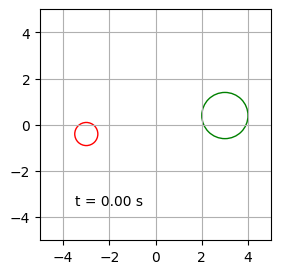

In [20]:
fig = plt.figure(figsize=(3,3))
ax = fig.gca()
ax.set_aspect(1)
plt.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)

c1 = plt.Circle((x1[0], y1[0]), R1, fc='none', ec='red', lw=1)
ax.add_patch(c1)
c2 = plt.Circle((x2[0], y2[0]), R2, fc='none', ec='green', lw=1)
ax.add_patch(c2)

ts = f't = {t0[0]:.2f} s'
tx = ax.text(-3.5, -3.5, ts)

plt.show()

def update(i):
    c1.center = x1[i], y1[i]
    c2.center = x2[i], y2[i]
    ts = f't = {t0[i]:.2f} s'
    tx.set_text(ts)
    return _

ani = animation.FuncAnimation(fig=fig, func=update, frames=200)
ani.save(filename="test3a.mp4", writer="ffmpeg", fps=25)

<video src="test3a.mp4" controls></video>